/home/epele/micromamba/envs/license/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/epele/micromamba/envs/license/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/epele/micromamba/envs/license/lib/python3.12/site-packages/detectree/pixel_features.py:121: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  neighborhood = morphology.square(2 * min_neighborhood_rang

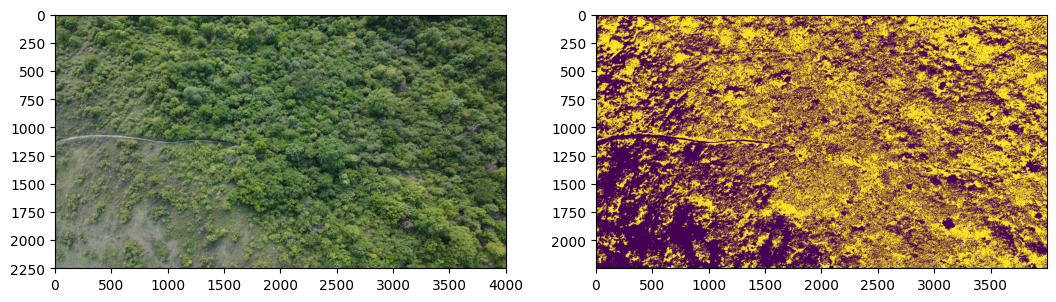

In [4]:
import detectree as dtr
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import plot


tile_filename = "test_2.JPG"

# use the pre-trained model to segment the image into tree/non-tree-pixels
y_pred = dtr.Classifier().predict_img(tile_filename)

# side-by-side plot of the tile and the predicted tree/non-tree pixels
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
with rio.open(tile_filename) as src:
    plot.show(src, ax=axes[0])
axes[1].imshow(y_pred)

/home/epele/micromamba/envs/license/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/epele/micromamba/envs/license/lib/python3.12/site-packages/detectree/pixel_features.py:121: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  neighborhood = morphology.square(2 * min_neighborhood_range + 1)
/home/epele/micromamba/envs/license/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/epele/micromamba/envs/license/lib/python3.12

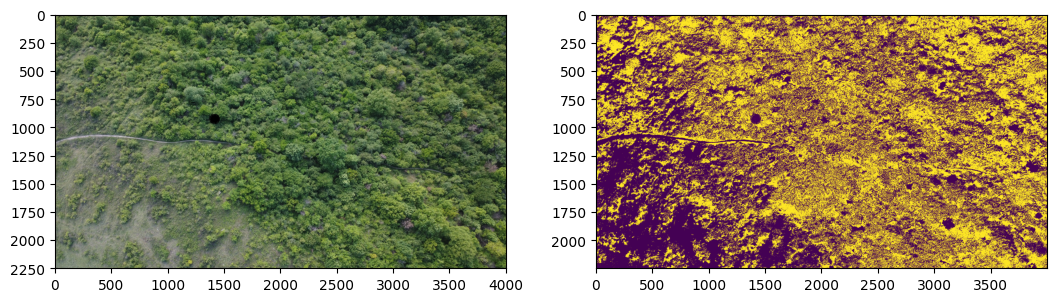

In [5]:

tile_filename = "test_3.JPG"

# use the pre-trained model to segment the image into tree/non-tree-pixels
y_pred_1 = dtr.Classifier().predict_img(tile_filename)

# side-by-side plot of the tile and the predicted tree/non-tree pixels
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
with rio.open(tile_filename) as src:
    plot.show(src, ax=axes[0])
axes[1].imshow(y_pred_1)

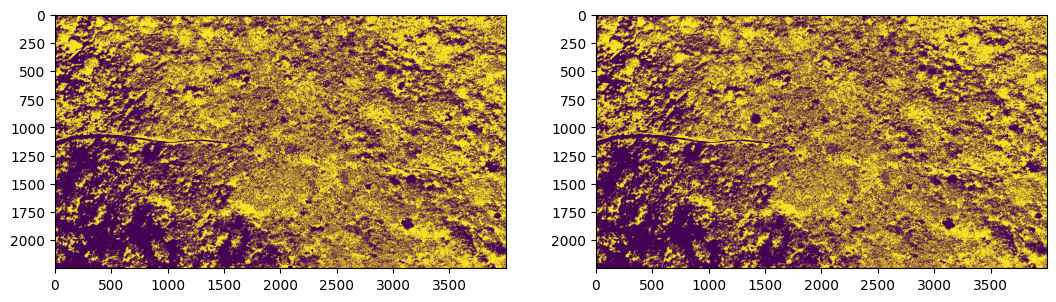

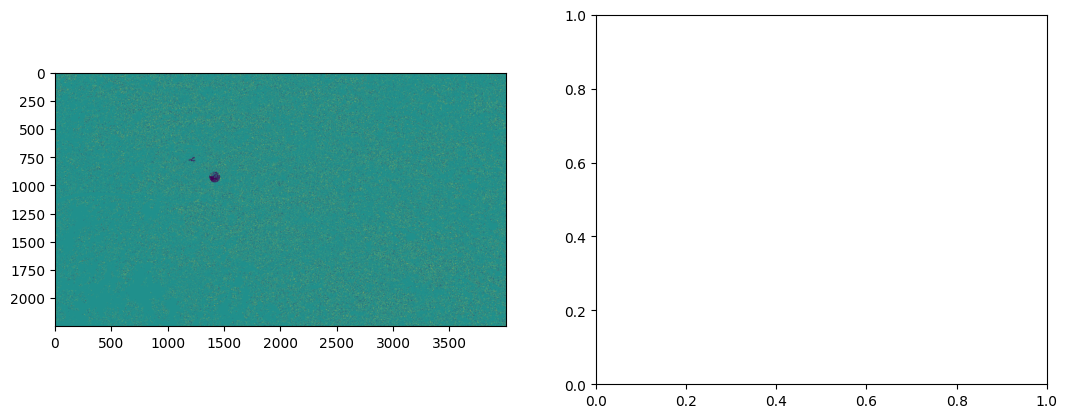

In [6]:
# Compare the two predictions and plot the difference
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
axes[0].imshow(y_pred)
axes[1].imshow(y_pred_1)
# Plot the difference between the two predictions
diff = y_pred_1 - y_pred
fig, axes = plt.subplots(1, 2, figsize=(2 * figwidth, figheight))
axes[0].imshow(diff)


The two prediction masks are different.
Number of different pixels: 672475
Percentage of pixels that are different: 7.47%


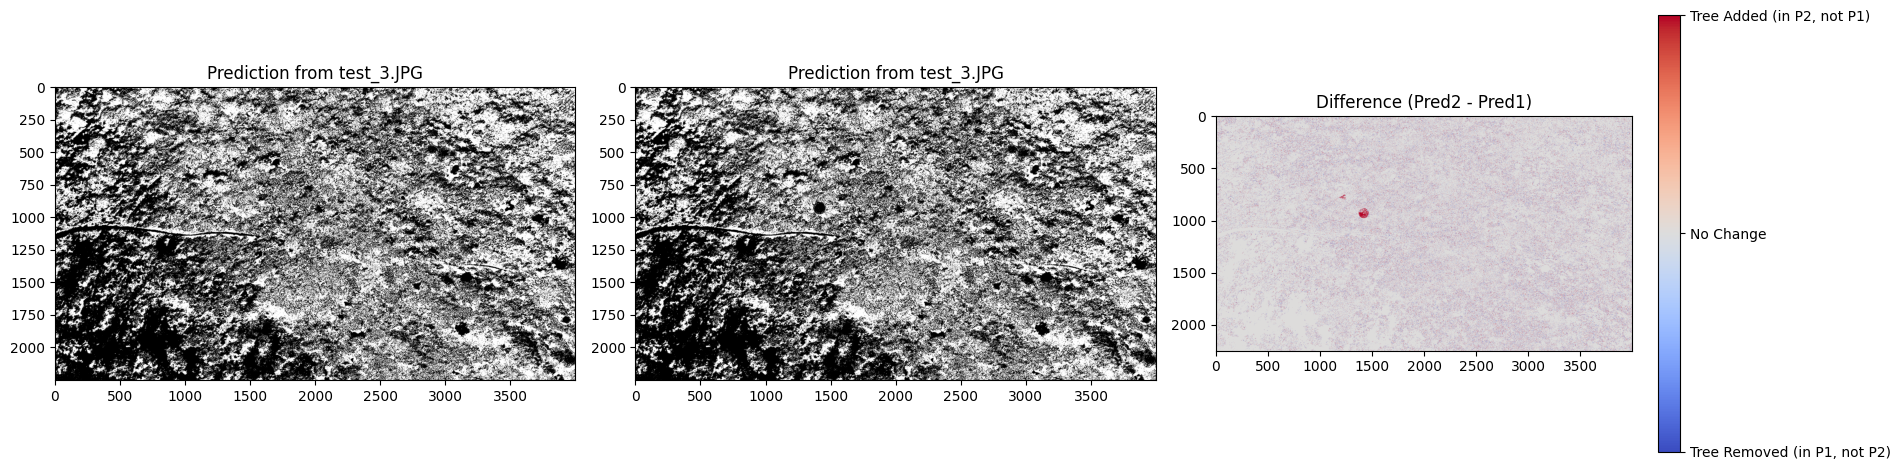

Pixels where trees were added in prediction 2: 332849
Pixels where trees were removed in prediction 2 (present in 1): 339626


In [8]:
import numpy as np

if y_pred.shape != y_pred_1.shape:
    print("Error: Prediction shapes do not match. Cannot compare.")
    # Handle this case, e.g., by resizing, cropping, or exiting
    # For this example, we'll assume they match if the code reaches here.
    # If your input images can have different dimensions, dtr might output
    # predictions of different dimensions.
else:
    # Method 1: Boolean check - are they exactly the same?
    are_identical = np.array_equal(y_pred, y_pred_1)
    if are_identical:
        print("The two prediction masks are identical.")
    else:
        print("The two prediction masks are different.")

        # Method 2: Quantify the difference
        # `y_pred != y_pred_1` creates a boolean array (True where different)
        # Summing it treats True as 1 and False as 0
        num_different_pixels = np.sum(y_pred != y_pred_1)
        total_pixels = y_pred.size
        percentage_difference = (num_different_pixels / total_pixels) * 100
        print(f"Number of different pixels: {num_different_pixels}")
        print(f"Percentage of pixels that are different: {percentage_difference:.2f}%")

        # Calculate the difference image:
        # y_pred and y_pred_1 are likely boolean (0 or 1) or uint8 (0 or 1)
        # Convert to a type that can handle negative numbers if not already
        diff = y_pred_1.astype(np.int8) - y_pred.astype(np.int8)
        # diff will contain:
        #  0: No change
        #  1: Tree in y_pred_1, not in y_pred (pixel added)
        # -1: Tree in y_pred, not in y_pred_1 (pixel removed)

        # Plot the individual predictions and the difference
        fig_comp, axes_comp = plt.subplots(1, 3, figsize=(3 * figwidth, figheight))

        axes_comp[0].imshow(y_pred, cmap='gray') # Assuming binary, gray is fine
        axes_comp[0].set_title(f"Prediction from {tile_filename}")

        axes_comp[1].imshow(y_pred_1, cmap='gray')
        axes_comp[1].set_title(f"Prediction from {tile_filename}")

        # Use a diverging colormap for the difference
        # 'coolwarm': red for negative, blue for positive, white for zero
        # 'RdBu_r' is another good one (Red-Blue, reversed)
        # 'bwr' (Blue-White-Red)
        im_diff = axes_comp[2].imshow(diff, cmap='coolwarm', vmin=-1, vmax=1)
        axes_comp[2].set_title("Difference (Pred2 - Pred1)")

        # Add a colorbar for the difference plot
        cbar = fig_comp.colorbar(im_diff, ax=axes_comp[2], ticks=[-1, 0, 1])
        cbar.ax.set_yticklabels(['Tree Removed (in P1, not P2)', 'No Change', 'Tree Added (in P2, not P1)'])

        plt.tight_layout()
        plt.show()

        # You can also count additions and removals specifically:
        pixels_added = np.sum(diff == 1)
        pixels_removed = np.sum(diff == -1) # or np.sum(diff < 0)
        print(f"Pixels where trees were added in prediction 2: {pixels_added}")
        print(f"Pixels where trees were removed in prediction 2 (present in 1): {pixels_removed}")